<a href="https://colab.research.google.com/github/sumanthkrishna/DS-Capstone/blob/main/Model_Analyse_Drug_OverDose_Deaths_in_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Analysis of Drug overdose and deaths


## Goal

* Illicit drugs are drugs that have been prohibited under international drug control treaties. Excess consumption or dependency on illicit drugs can impact overall health, mental well-being, and in many cases, the well-being of others. Not all illicit drugs have similar impacts on health and well-being: some cause much less harm than others.

* The goal of this project is to develop a data science model that analyzes the impact of illicit drugs on health and well-being. By leveraging data analytics and machine learning techniques, aim to identify patterns, trends, and correlations between different types of illicit drugs and their associated health risks. Ultimately, the goal is to provide insights that can inform public health policies, interventions, and educational initiatives aimed at reducing the harm caused by illicit drug use.

The solution is given in four parts

1. EDA & Visualization
2. Feature training & Model Preparation
3. Modeal Performance and Selection
4. Conclusion & next steps

# Part-1: EDA & Visualization

1. Load data
2. Clean up the data
3. Clear mis-spelt words for better results
4. Run Deaths against age, gender, race, drug, resident city, death city, dosage
5. Observations



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import itertools
from wordcloud import WordCloud
from itertools import combinations

In [ ]:
# Read/Load data

df = pd.read_csv('/content/drug_deaths.csv')

In [ ]:
# Basic checks of df

print("Shape of data frame : {} Rows, {} Columns".format(*df.shape))


df.head()


df.info()



Shape of data frame : 5105 Rows, 42 Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 

In [ ]:
df.sample(5)

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
575,575,16-0038,01/20/2016 12:00:00 AM,0.0,43.0,Male,White,OAKVILLE,LITCHFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Waterbury, CT\n(41.554261, -73.043069)","OAKVILLE, CT\n(41.588864, -73.087377)",NaN
4378,4378,17-0096,02/03/2017 12:00:00 AM,1.0,32.0,Male,White,SOUTH GLASTONBURY,HARTFORD,CT,...,0,0,0,NaN,0,0,Accident,"Middletown, CT\n(41.544654, -72.651713)","SOUTH GLASTONBURY, CT\n(41.666901, -72.597198)","SOUTH GLASTONBURY, CT\n(41.666901, -72.597198)"
4911,4911,16-0565,08/21/2016 12:00:00 AM,0.0,40.0,Female,White,HARTFORD,HARTFORD,CT,...,0,0,0,HYDMORPH,0,1,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)"
4318,4318,18-0088,02/06/2018 12:00:00 AM,1.0,28.0,Male,White,SOUTHBURY,NEW HAVEN,CT,...,0,0,0,NaN,0,1,Accident,"Bridgeport, CT\n(41.179195, -73.189476)","SOUTHBURY, CT\n(41.466592, -73.203497)","SOUTHBURY, CT\n(41.466592, -73.203497)"
1871,1871,18-0002,01/02/2018 12:00:00 AM,1.0,25.0,Male,"Hispanic, White",HARTFORD,HARTFORD,CT,...,0,0,0,NaN,0,1,Accident,"Hartford, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)"


In [ ]:


df.describe()

,Unnamed: 0,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
count,5105.000000,5103.000000,5102.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,2552.000000,0.446992,41.964916,0.495397,0.297943,0.076200,0.118903,0.021156,0.244270,0.023115,0.263075,0.092850,0.031146,0.025465,0.004897,0.017238
std,1473.830893,0.497231,12.336639,0.500028,0.457399,0.265344,0.323706,0.143917,0.429696,0.150282,0.440346,0.290251,0.173729,0.157549,0.069815,0.130170
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1276.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2552.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3828.000000,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5104.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cleaning of the dataset

1. Find the unique columns
2. Converting into int type
3. Considering only 0 and 1 values for the cause of death as Yes or No


In [ ]:
columns=df.columns
columns=columns[-21:-4]
for i in columns:
    print(df[i].unique())

#Converting to int type
df[columns[3]]=df[columns[3]].astype('int64')

#Taking only 0 and 1 values for cause of death as Yes or No
columns=columns[2],columns[12],columns[16]
for i in columns:
    for j in range(5105):
        if df.loc[j,i]=='0' or df.loc[j,i]==0:
            df.loc[j,i]=0
        else:
            df.loc[j,i]=1



[0 1]
[0 1]
['1' '0' '1-A' '1 POPS' '1 (PTCH)']
[0. 1.]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
['0' '1' '1ES' 'STOLE MEDS' 'NO RX BUT STRAWS' 'PCP NEG']
[0 1]
[nan 'Bupren' 'lsd, hydromorph' 'opiate' 'BUPREN' 'HYDROMORPH' 'OTHERS'
 'pcp' 'PCP' 'ketamine' 'meperidine' 'opiate screen' 'MDMA' 'COD' 'PAROX'
 'carfentanil' 'hydromorph' 'DUSTER' 'DIPHENHYDRAMINE' 'Buprenor'
 'HYDRO MORPH' 'BUPRE' 'MORPHINE' 'morphine' 'MORPH' 'hyd-morph' 'U47700'
 'DOX, DIPHEN' 'opiates' 'Buprenor, carfentanil' 'mdma' 'SERT'
 'TAPENTADOL' '4-anpp' 'methoxyPCP' 'N-ETHYL-PENTYLONE' 'PCP, HYDROMORPH'
 'Mirtagynine' 'UK' 'HYDROMORP' 'U-47700' 'difluro'
 'DIPHENHYDRAMINE, ZOLPIDEM' '4-ANPP' 'BUPRENORPHINE' 'Difluro' 'H-MORPH'
 'BUPRENORP' 'U-47700 synthetic opioid' 'OPIATE' 'Buprnor' 'morphine RX'
 'opioid' 'OPIOID NOS' 'BUPRENOR' 'CATHINONE' 'LOPERAMIDE' 'codeine' 'GHB'
 'hydromorp' 'BUTALBITAL' 'Morphine' 'PCP, N-ETHYL-PENTYLONE'
 'Bupren, HEXADRONE' 'bupren' 'HYDR-MOR' 'pos 6-mam' 'Rx morphine'
 'Bupr

## Count number of deaths by drug

In [ ]:
#Count of deaths due to each drug
columns=df.columns
drugs={}
for i in range(-21,-7,1):
    s=df[columns[i]].sum()
    print(columns[i],s)
    drugs[columns[i]]=s
for i in range(-6,-4):
    s=df[columns[i]].sum()
    print(columns[i],s)
    drugs[columns[i]]=s

Heroin 2529
Cocaine 1521
Fentanyl 2232
Fentanyl_Analogue 389
Oxycodone 607
Oxymorphone 108
Ethanol 1247
Hydrocodone 118
Benzodiazepine 1343
Methadone 474
Amphet 159
Tramad 130
Morphine_NotHeroin 42
Hydromorphone 25
OpiateNOS 88
AnyOpioid 2466


In [ ]:
df.groupby('Other').Other.count()



Other
2-A            1
4-ANPP         1
4-anpp         3
BUPRE          3
BUPREN        24
              ..
pos 6-mam      1
snorted        1
tapentadol     2
uk             1
zolpidem       1
Name: Other, Length: 134, dtype: int64

### Looking at the other gives a sense that some of the names are mis-spelled and we could use fuzzywuzzy to correct them!

In [ ]:
#!/usr/bin/env python
!pip install fuzzywuzzy
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.9 MB/s eta 0:00:00


In [ ]:
import fuzzywuzzy

from fuzzywuzzy import process

#Input:dataframe,column name, correct name, min similarity value, max similarity value and words to skip, in the order.
def replace_matches(df,column,str_to_match,min_ratio=50,max_ratio=100,leave=[]):
    strs=df[column].unique()
    matches=fuzzywuzzy.process.extract(str_to_match,strs,limit=10,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_match=[match[0] for match in matches if match[1]>=min_ratio and match[1]<max_ratio and match[0] not in leave]
    rows=df[column].isin(close_match)
    df.loc[rows,column]=str_to_match

df['Other']=df['Other'].str.lower()
df['Other']=df['Other'].str.strip()

In [ ]:
other=df['Other'].unique()
#Getting word mattchings
matches=fuzzywuzzy.process.extract('buprenorphine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
#Replacing the matches by correct word
replace_matches(df=df,column='Other',str_to_match='buprenorphine',min_ratio=61,leave=['morphine','morphiine','buprop','buprno'])
rows=df['Other'].isin(['buprenor, carfentanil','bupren, difluoro','bupre','bupren','pcp. bupren','bupren, hexadrone'])
df.loc[rows,'Other']='buprenorphine'



In [ ]:
matches=fuzzywuzzy.process.extract('hydromorphone',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='hydromorphone',min_ratio=67,leave=['morphine'])
rows=df['Other'].isin(['hydrom','h-morph','hydromorph, buprenor','hyd-morph','hydr-mor'])
df.loc[rows,'Other']='hydromorphone'


In [ ]:
matches=fuzzywuzzy.process.extract('morphine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='morphine',min_ratio=59,leave=['hydromorphone','buprenorphine','mitragine'])
rows=df['Other'].isin(['morphine, no rx in pmp','morphine no 6mam','morph/cod','morph pcp'])
df.loc[rows,'Other']='morphine'

In [ ]:
matches=fuzzywuzzy.process.extract('opioid',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='opioid',min_ratio=46,leave=['zolpidem','buprenorphine','morphine'])
rows=df['Other'].isin(['u-47700 synthetic opioid','opiate screen','u-47700','u-47700, carfentanil','u47700'])
df.loc[rows,'Other']='opioid'

In [ ]:
matches=fuzzywuzzy.process.extract('zolpidem',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='zolpidem',min_ratio=50,leave=['opioid','morphine'])

In [ ]:
matches=fuzzywuzzy.process.extract('diphenhydramine',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='diphenhydramine',min_ratio=56)
rows=df['Other'].isin(['diphen, chlorphen'])
df.loc[rows,'Other']='diphenhydramine'

In [ ]:
matches=fuzzywuzzy.process.extract('phenobarbital',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='phenobarbital',min_ratio=67)

In [ ]:
matches=fuzzywuzzy.process.extract('difluorofentanyl',other,limit=20,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
replace_matches(df=df,column='Other',str_to_match='difluorofentanyl',min_ratio=58,leave=['carfentanil'])

In [ ]:
df.groupby('Other').Other.count().sort_values()

Other
2-a                         1
mitragine                   1
mdma, pcp                   1
mdma, n-ethyl-pentylone     1
mitragynine                 1
n-ethyl-pentylone           1
ket                         1
parox                       1
pcp, morphine nos           1
pcp, n-ethyl-pentylone      1
methoxypcp                  1
pos 6-mam                   1
quiet                       1
cathinone                   1
sert                        1
butalbital                  1
butalb                      1
buprop                      1
buprno                      1
snorted                     1
bath salt                   1
topiramate                  1
pseudo                      1
mirtagynine                 1
phenobarbital               2
meperidine                  2
ghb                         2
uk                          2
zolpidem                    3
4-anpp                      4
tapentadol                  4
carfentanil                 4
cod                         4
othe

In [ ]:
#Replacing misspelled words
rows=df['Other'].isin(['buprop','buprno'])
df.loc[rows,'Other']='bupropion'

rows=df['Other'].isin(['mdma, n-ethyl-pentylone','mdma, pcp'])
df.loc[rows,'Other']='mdma'

rows=df['Other'].isin(['butalb'])
df.loc[rows,'Other']='butalbital'

rows=df['Other'].isin(['cod'])
df.loc[rows,'Other']='codeine'

rows=df['Other'].isin(['ket'])
df.loc[rows,'Other']='ketamine'

rows=df['Other'].isin(['parox'])
df.loc[rows,'Other']='paroxetine'

rows=df['Other'].isin(['pcp, n-ethyl-pentylone','n-ethyl-pentylone','methoxypcp','pcp, morphine nos'])
df.loc[rows,'Other']='pcp'

rows=df['Other'].isin(['mitragine','mirtagynine'])
df.loc[rows,'Other']='mitragynine'

rows=df['Other'].isin(['others'])
df.loc[rows,'Other']='unidentified'
df['Other']=df['Other'].str.title()
df=df.replace('Other','Unidentified')
df=df.replace('Unknown','Unidentified')

In [ ]:
df.groupby('Other').Other.count().sort_values()

Other
2-A                  1
Bath Salt            1
Topiramate           1
Snorted              1
Sert                 1
Quiet                1
Cathinone            1
Pseudo               1
Pos 6-Mam            1
Paroxetine           1
Uk                   2
Phenobarbital        2
Meperidine           2
Bupropion            2
Butalbital           2
Ghb                  2
Zolpidem             3
Mitragynine          3
4-Anpp               4
Tapentadol           4
Carfentanil          4
Unidentified         5
Diphenhydramine      6
Duster               6
Ketamine             7
Difluorofentanyl     9
Codeine              9
Mdma                 9
Hydromorphone       53
Opioid              54
Pcp                 68
Morphine            80
Buprenorphine       89
Name: Other, dtype: int64

In [ ]:
d=0
other=df['Other'].unique()
for p in df.groupby('Other').Other.count().sort_values(ascending=False):
    drugs[other[d]]=p
    d+=1
drugsdf=pd.DataFrame(drugs.items())
drugsdf=drugsdf.sort_values(by=[1],axis=0,ascending=False)
drugsdf.reset_index(drop=True)

,0,1
0,Heroin,2529
1,AnyOpioid,2466
2,Fentanyl,2232
3,Cocaine,1521
4,Benzodiazepine,1343
5,Ethanol,1247
6,Oxycodone,607
7,Methadone,474
8,Fentanyl_Analogue,389
9,Amphet,159


## Visualization


Text(0.5, 1.0, 'Deaths By Drugs')

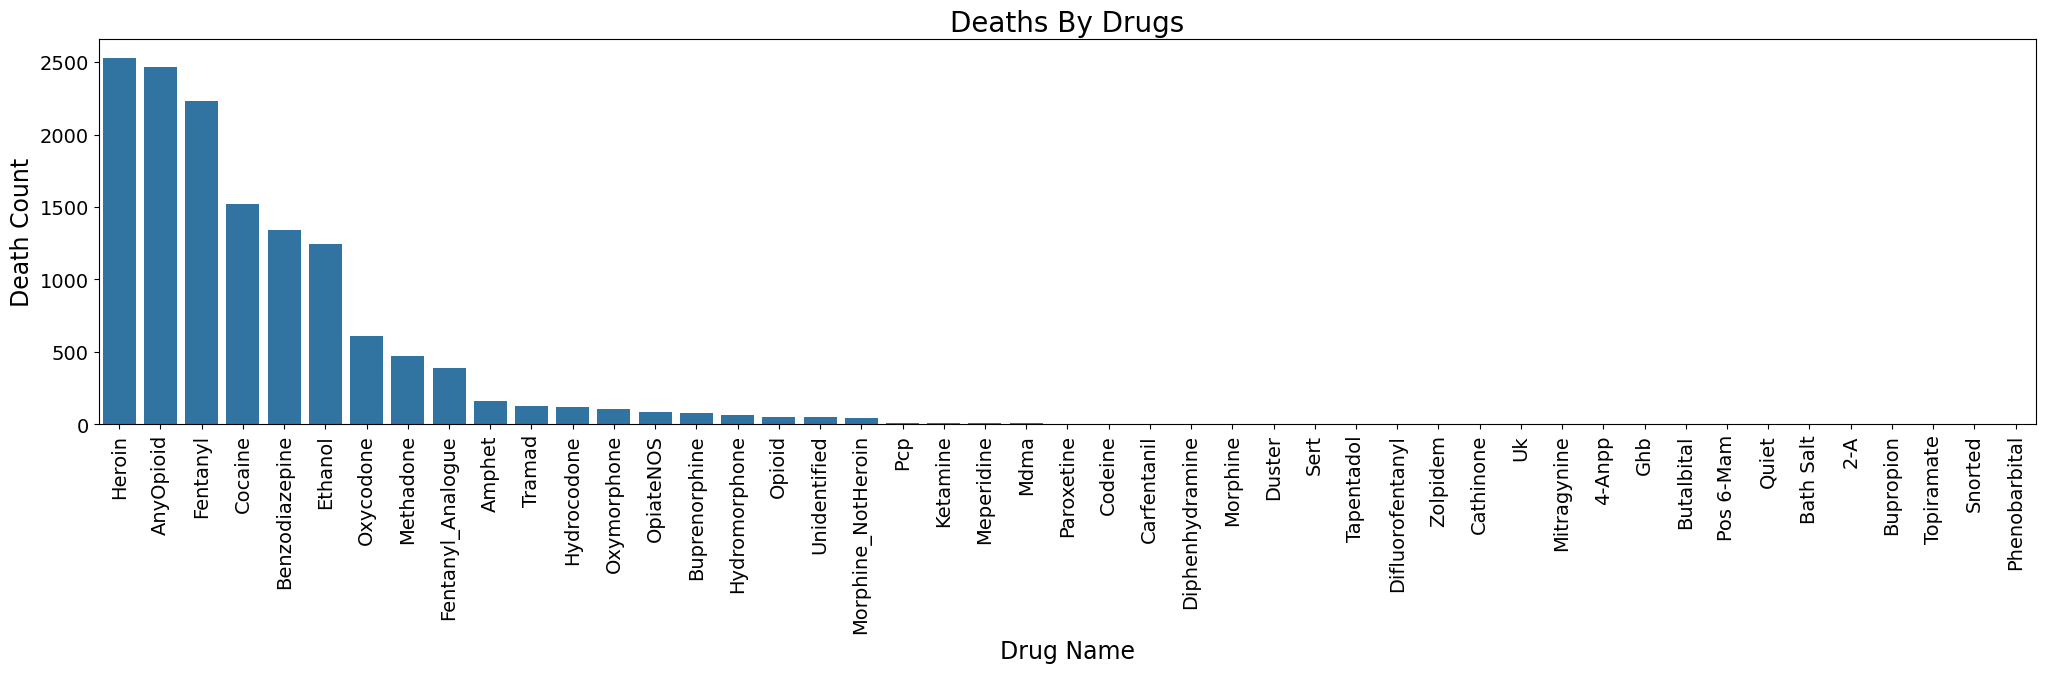

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,5))
sns.barplot(x=drugsdf[0],y=drugsdf[1],data=drugsdf)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Drug Name',size=17)
plt.ylabel('Death Count',size=17)
plt.title('Deaths By Drugs',size=20)

Text(0, 0.5, 'Death count')

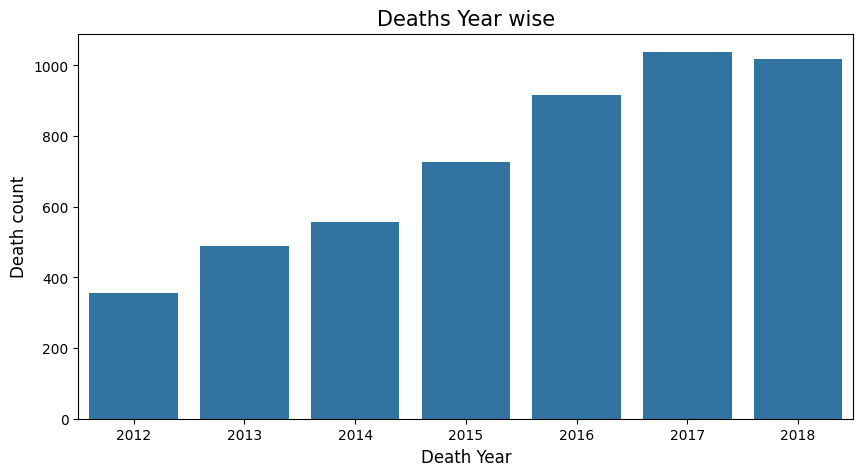

In [ ]:
plt.figure(figsize=(10,5))
year = pd.DataFrame(pd.to_datetime(df['Date']).dt.year.value_counts())
sns.barplot(x=year.index.astype('int64'),y=year['Date'],data=year)
plt.title('Deaths Year wise',size=15)
plt.xlabel('Death Year',size=12)
plt.ylabel('Death count',size=12)

In [ ]:
city=pd.DataFrame(df['ResidenceCity'].value_counts())
city_top_40 = city.iloc[:40]

Text(0.5, 1.0, 'Resident Cities by Most Deaths')

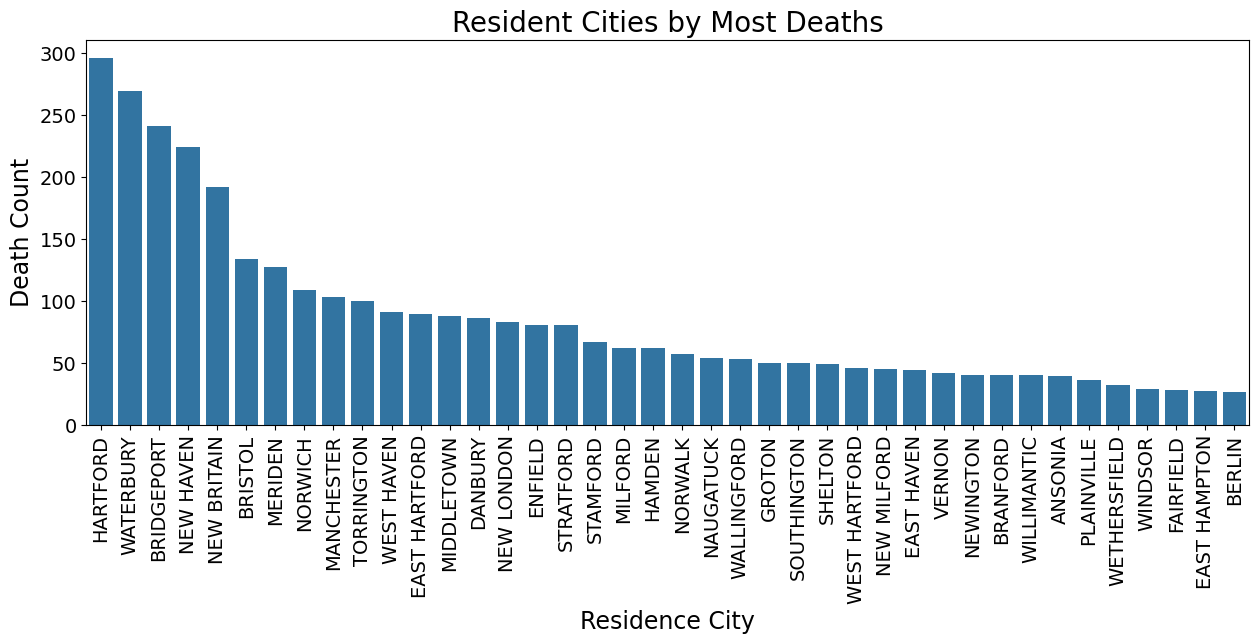

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=city_top_40.index, y=city_top_40['ResidenceCity'], data=city_top_40)

plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Residence City',size=17)
plt.ylabel('Death Count',size=17)
plt.title('Resident Cities by Most Deaths',size=20)

Text(0.5, 1.0, 'Top 40 Cities with Highest no. of Reported Deaths')

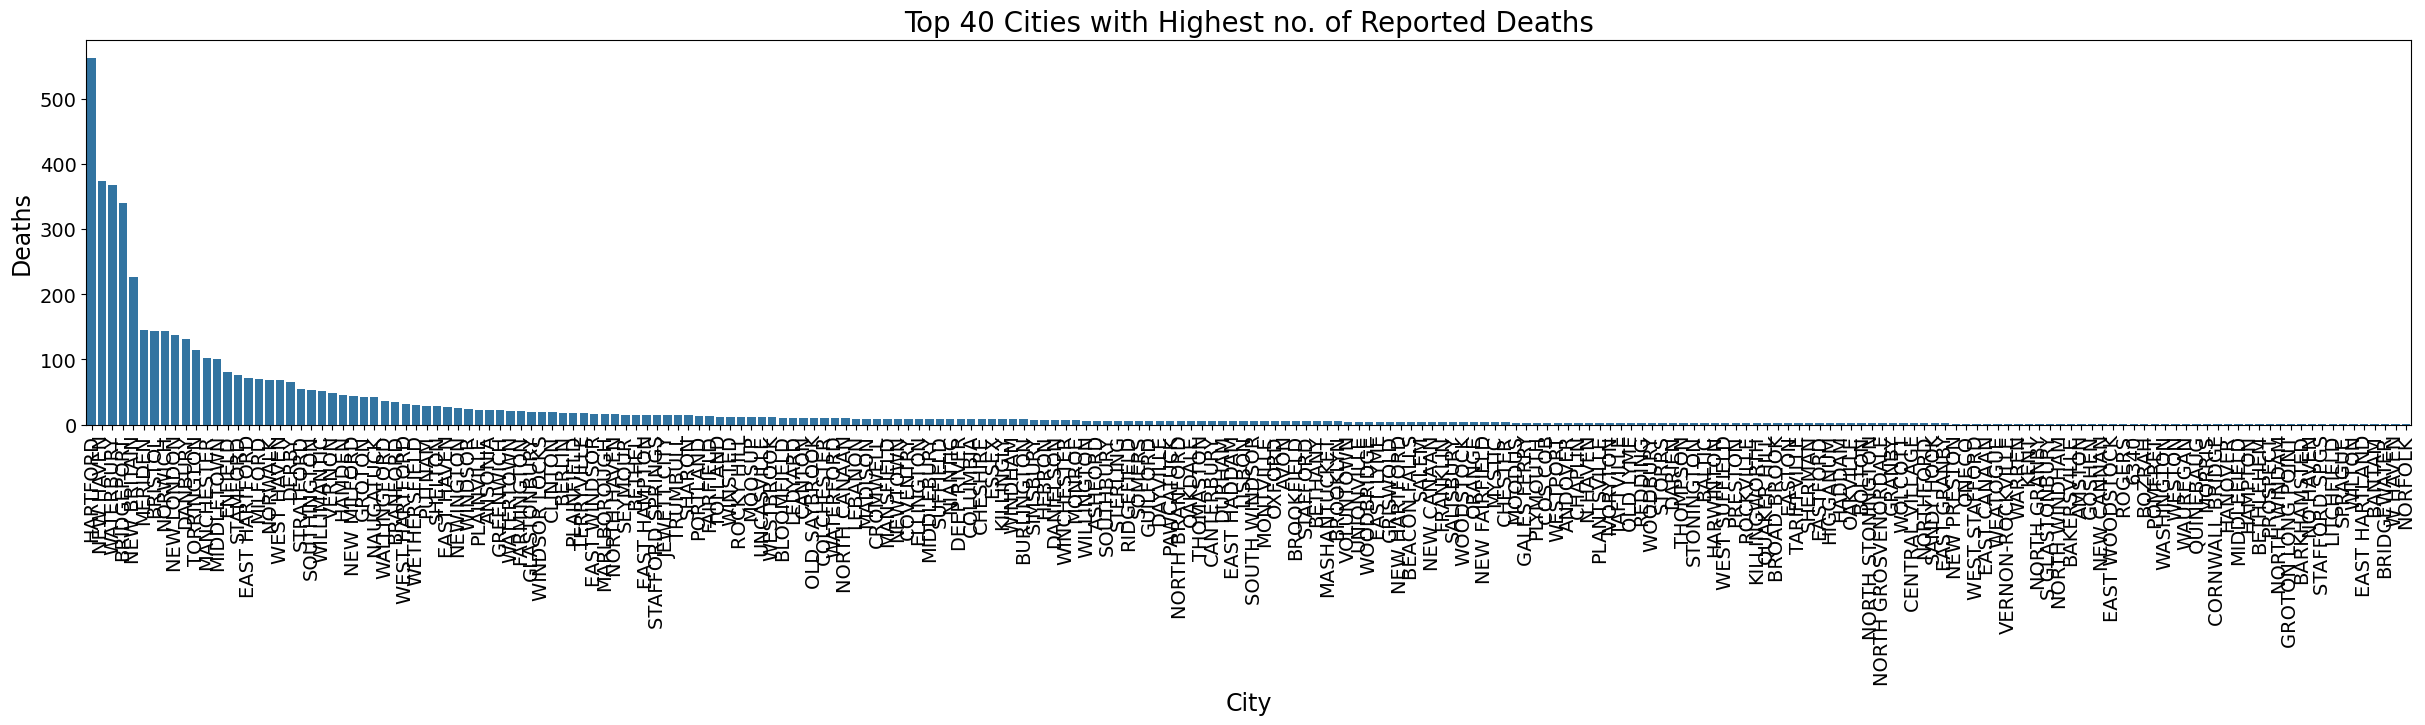

In [ ]:
death_city = pd.DataFrame(df['DeathCity'].value_counts())

plt.figure(figsize=(30, 5))
sns.barplot(
    x=death_city.index,
    y=death_city['DeathCity'],
    data=death_city
)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel('City', size=17)
plt.ylabel('Deaths', size=17)
plt.title('Top 40 Cities with Highest no. of Reported Deaths', size=20)

([<matplotlib.patches.Wedge at 0x7e4d19e089a0>,
 [Text(-1.4429570220316665, -1.355830016104344, 'Male'),
  Text(1.4429571489736284, 1.3558298810049507, 'Female')],
 [Text(-0.7870674665627272, -0.739543645147824, '74.01%  (3,773)'),
  Text(0.7870675358037973, 0.7395435714572458, '25.99%  (1,325)')])

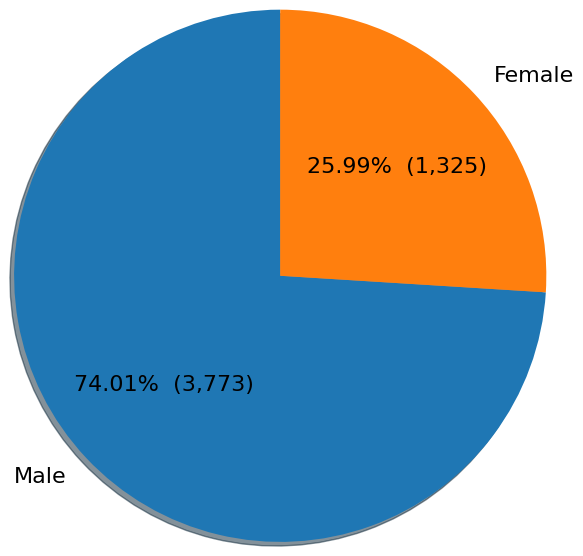

In [ ]:
male = df['Sex'].value_counts().values[0]
female = df['Sex'].value_counts().values[1]

plt.pie([male,female],labels=['Male','Female'],autopct= lambda x:'{:.2f}%  ({:,.0f})'.format(x,x*sum([male,female])/100),shadow=True, startangle=90,radius=1.8,textprops={'fontsize':16})

[nan 'Black' 'White' 'Asian, Other' 'Hispanic, White' 'Asian Indian'
 'Hispanic, Black' 'Unidentified' 'Chinese' 'Native American, Other'
 'Hawaiian']


Text(0.5, 1.0, 'Deaths Among Different Ethnicities')

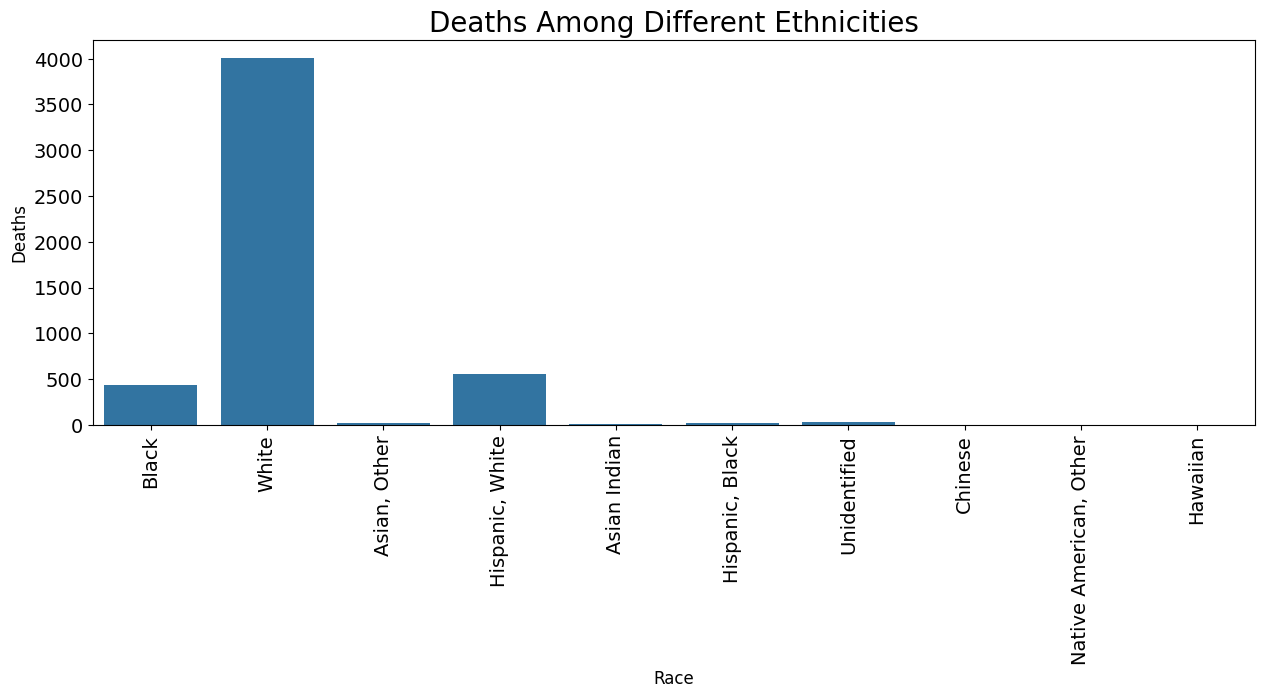

In [ ]:
print(df['Race'].unique())

plt.figure(figsize=(15,5))
sns.countplot(x='Race',data=df)
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.xlabel('Race',size=12)
plt.ylabel('Deaths',size=12)
plt.title('Deaths Among Different Ethnicities',size=20)

<ipython-input-30-b874b0173262>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


Text(0.5, 1.0, 'Death Distribution by Age')

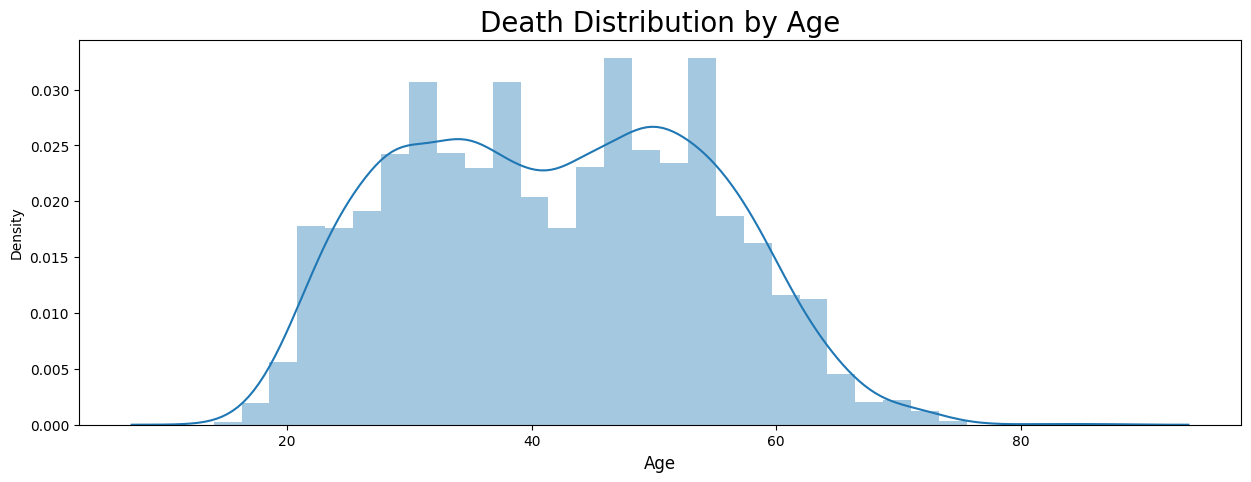

In [ ]:
df['Age']=df['Age'].replace('Unidentified',0)
plt.figure(figsize=(15,5))
sns.distplot(df['Age'])
plt.xlabel('Age',size=12)
plt.title('Death Distribution by Age',size=20)

In [ ]:

time_cols = [
    "Date"
]
drug_cols = [
    'Heroin',
    'Cocaine',
    'Fentanyl',
    'Fentanyl_Analogue',
    'Oxycodone',
    'Oxymorphone',
    'Ethanol',
    'Hydrocodone',
    'Benzodiazepine',
    'Methadone',
    'Amphet',
    'Tramad',
    'Morphine_NotHeroin',
    'Hydromorphone',
    'Other',
    'OpiateNOS']



categorical_cols = [
    "DescriptionofInjury",
    'MannerofDeath',
    'Sex',
    'Race',
    'Location',
    'ResidenceState',
    'AnyOpioid'
]


continuous_cols = [
    'Age',
    'totalDrugs'
]

text_cols = [
    "COD"
]

geo_cols =  [
    'latitude',
    'longitude'
]

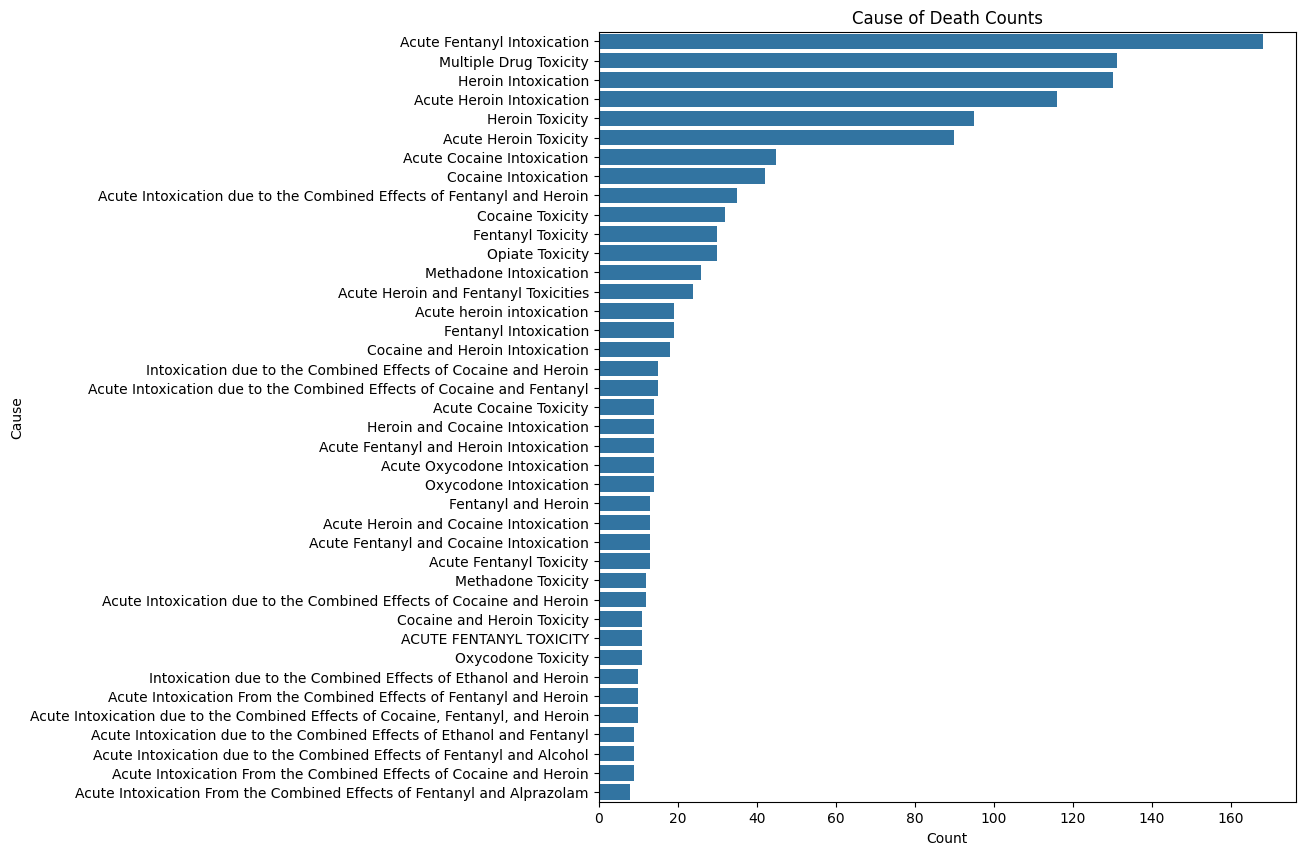

In [ ]:
f, ax = plt.subplots(figsize=[9,10])
sns.countplot(y=df["COD"], order=df["COD"].value_counts().index[:40], ax=ax)
ax.set_title("Cause of Death Counts")
ax.set_ylabel("Cause")
ax.set_xlabel("Count")
plt.show()

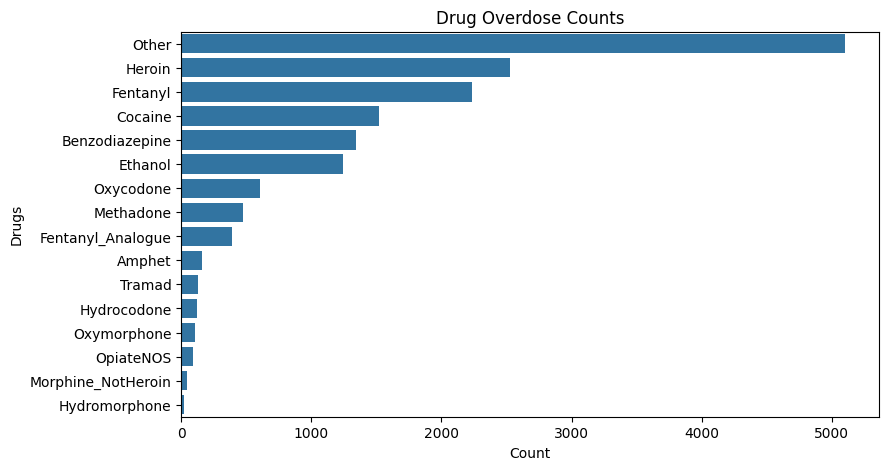

In [ ]:
drug_df = pd.melt(df, id_vars=[x for x in df.columns if x not in drug_cols], value_vars=drug_cols)
drug_df = drug_df.loc[drug_df.value != 0].drop("value", axis=1)
drug_df.rename(columns={"variable":"Drugs"}, inplace=True)

f, ax = plt.subplots(figsize=[9,5])
sns.countplot(y=drug_df["Drugs"], order=drug_df["Drugs"].value_counts().index, ax=ax)
ax.set_title("Drug Overdose Counts")
ax.set_ylabel("Drugs")
ax.set_xlabel("Count")
plt.show()

In [ ]:
cm = sns.light_palette("purple", as_cmap=True)
crosstab_tmp = pd.crosstab(drug_df['Drugs'], drug_df['Race'], normalize='columns').mul(100).astype(int)
print("Column Normalised Drug Overdose by Race")
display(crosstab_tmp.style.background_gradient(cmap = cm))

Column Normalised Drug Overdose by Race


Race,Asian Indian,"Asian, Other",Black,Chinese,Hawaiian,"Hispanic, Black","Hispanic, White","Native American, Other",Unidentified,White
Drugs,,,,,,,,,,
Amphet,2,1,0,0,0,0,0,0,0,1
Benzodiazepine,4,7,3,20,33,2,5,0,5,9
Cocaine,10,11,17,0,0,8,11,0,10,8
Ethanol,10,5,9,0,0,10,6,0,9,7
Fentanyl,20,12,13,0,0,21,15,0,16,13
Fentanyl_Analogue,6,1,3,0,0,4,2,0,2,2
Heroin,14,20,12,40,0,12,17,0,16,15
Hydrocodone,2,0,0,0,0,0,0,50,0,0
Hydromorphone,0,0,0,0,0,0,0,0,0,0


In [ ]:
cm = sns.light_palette("blue", as_cmap=True)
crosstab_tmp = pd.crosstab(drug_df['Drugs'], drug_df['Sex'], normalize='columns').drop("Unidentified", axis=1).mul(100).astype(int)
print("Column Normalised Drug Overdose by Gender")
display(crosstab_tmp.style.background_gradient(cmap = cm))

Column Normalised Drug Overdose by Gender


Sex,Female,Male
Drugs,,
Amphet,1,0
Benzodiazepine,11,7
Cocaine,9,9
Ethanol,6,8
Fentanyl,11,14
Fentanyl_Analogue,1,2
Heroin,13,16
Hydrocodone,1,0
Hydromorphone,0,0


In [ ]:
cm = sns.light_palette("red", as_cmap=True)
crosstab_tmp = pd.crosstab(drug_df['Drugs'], drug_df['Location'])
print("Drug Overdose Count by Location")
crosstab_tmp.style.background_gradient(cmap = cm)

Drug Overdose Count by Location


Location,Convalescent Home,Hospice,Hospital,Nursing Home,Residence,Unidentified
Drugs,,,,,,
Amphet,0,0,44,0,87,27
Benzodiazepine,2,0,378,0,786,172
Cocaine,0,1,495,0,684,334
Ethanol,1,0,361,0,645,236
Fentanyl,1,0,685,0,1167,371
Fentanyl_Analogue,0,0,115,0,191,83
Heroin,2,1,807,0,1290,424
Hydrocodone,0,0,28,0,84,5
Hydromorphone,0,0,5,0,16,4


In [ ]:
df.sample(5)

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
4864,4864,13-0455,12/16/2013 12:00:00 AM,0.0,27.0,Female,White,BRISTOL,HARTFORD,NaN,...,0,0,0,NaN,0,0,Accident,"Southington, CT\n(41.600428, -72.878105)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
4601,4601,16-0634,09/14/2016 12:00:00 AM,0.0,29.0,Male,White,NEWPORT,NEWPORT,RI,...,0,0,0,NaN,0,1,Accident,"ROCKY HILL, CT\n(41.667775, -72.636739)","NEWPORT, CT\n(41.667528, -72.783437)","ROCKY HILL, CT\n(41.667775, -72.636739)"
2745,2745,17-0600,07/16/2017 12:00:00 AM,1.0,29.0,Male,White,BROOKLYN,WINDHAM,CT,...,0,0,0,Opioid,0,0,Accident,"Brooklyn, CT\n(41.788252, -71.949628)","BROOKLYN, CT\n(41.788252, -71.949628)","BROOKLYN, CT\n(41.788252, -71.949628)"
1528,1528,15-0217,05/04/2015 12:00:00 AM,1.0,50.0,Male,White,STERLING,NaN,CT,...,0,0,0,NaN,0,1,Accident,"Sterling, CT\n(41.707458, -71.829067)","STERLING, CT\n(41.707458, -71.829067)","STERLING, CT\n(41.707458, -71.829067)"


## Observations

1. The highest incidence of drug overdose deaths is observed around the age of 45, with a sharp increase in the 20s and a subsequent decline after the age of 50.
2. Men account for nearly three times the number of deaths compared to women, which could be attributed to factors such as differences in drug consumption patterns or awareness levels among genders.
3. Hartford residents account for the highest number of casualties among all reported cases.
4. Hartford experiences a disproportionately high number of deaths compared to its population size.
5. Drug overdose-related fatalities witnessed an upward trend from 2012 to 2017, followed by a decrease in 2018.


In [ ]:
!pip install yellowbrick
import yellowbrick.features as features

!pip show yellowbrick

Name: yellowbrick
Version: 1.5
Summary: A suite of visual analysis and diagnostic tools for machine learning.
Home-page: http://scikit-yb.org/
Author: The scikit-yb developers
Author-email: yellowbrick@googlegroups.com
License: Apache 2
Location: /usr/local/lib/python3.10/dist-packages
Requires: cycler, matplotlib, numpy, scikit-learn, scipy
Required-by: 


<ipython-input-39-ba0cb7d5380f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df[drug_cols].corr(),


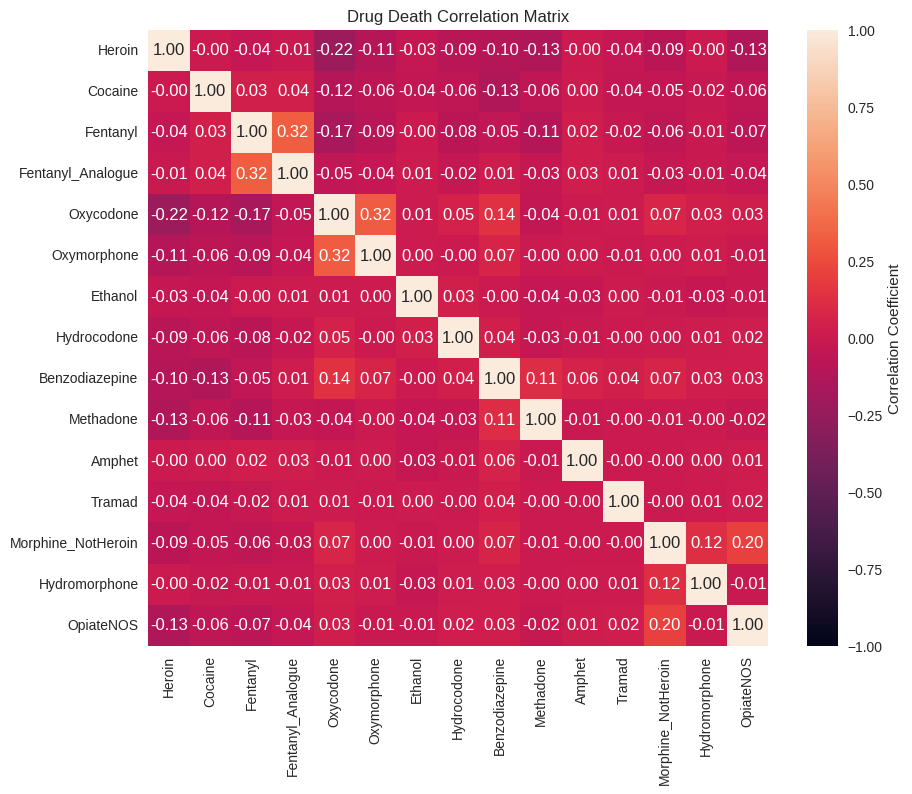

In [ ]:
f, ax = plt.subplots(figsize=[10,8])
ax = sns.heatmap(df[drug_cols].corr(),
                 annot=True, fmt=".2f",
                 vmin=-1, vmax=1,
                 cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Drug Death Correlation Matrix")
plt.show()

# Part-2: Model Prepearation ---> Drug-Heroin

In [ ]:
# Drop unnecessary columns
drug_deaths = df.drop(columns=['Unnamed: 0', 'ID', 'Date', 'DateType', 'DescriptionofInjury',
                                        'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState',
                                        'OtherSignifican', 'Other', 'OpiateNOS', 'AnyOpioid',
                                        'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'])


In [ ]:
drug_deaths = drug_deaths.dropna()

drug_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 39 to 5050
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 193 non-null    float64
 1   Sex                 193 non-null    object 
 2   Race                193 non-null    object 
 3   ResidenceCity       193 non-null    object 
 4   ResidenceCounty     193 non-null    object 
 5   ResidenceState      193 non-null    object 
 6   DeathCity           193 non-null    object 
 7   DeathCounty         193 non-null    object 
 8   Location            193 non-null    object 
 9   LocationifOther     193 non-null    object 
 10  COD                 193 non-null    object 
 11  Heroin              193 non-null    int64  
 12  Cocaine             193 non-null    int64  
 13  Fentanyl            193 non-null    int64  
 14  Fentanyl_Analogue   193 non-null    int64  
 15  Oxycodone           193 non-null    int64  
 16  Oxymor

In [ ]:
# Convert categorical variables to numerical format
drug_deaths = pd.get_dummies(drug_deaths)
drug_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 39 to 5050
Columns: 541 entries, Age to MannerofDeath_accident
dtypes: float64(1), int64(14), uint8(526)
memory usage: 123.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X = drug_deaths.drop(columns=['MannerofDeath_accident'])
y = drug_deaths['MannerofDeath_accident']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



# Part-3: Model Performance Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Split the dataset into training and testing sets
X = drug_deaths.drop(columns=['Heroin'])
y = drug_deaths['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model: {name}')
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.69      0.64      0.67        14

    accuracy                           0.77        39
   macro avg       0.75      0.74      0.75        39
weighted avg       0.77      0.77      0.77        39

Model: Random Forest
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.75      0.43      0.55        14

    accuracy                           0.74        39
   macro avg       0.75      0.67      0.68        39
weighted avg       0.74      0.74      0.72        39

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.21      0.35        14

    accuracy                           0.72        39
   macro avg       0.85      0.61      0.59       

# Part-4: Conclusions/Recommendations

### Random Forest classifier to predict the manner of death (target variable) based on various features in the dataset. Performed data preprocessing by dropping unnecessary columns, handling missing values, and converting categorical variables into numerical format using one-hot encoding. Then splitted the dataset into training and testing sets, trained the Random Forest model on the training data, and evaluated its performance using classification report metrics such as precision, recall, and F1-score.


### The visuals does emphasize that ethnically more “Whites” as young as “20” years are becoming victims and over they reach ages “35” the addition/overdosage is exploding. Run more patrols in the concerned cities/localities

### Recommend - more educational materials should be introduced right from young age and build consultation centers across the colleges/work locations to encourage everyone to lead a healthy lifestyle with awareness.

